# Import Data

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/dataset-of-10s.csv")

df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [195]:
df.shape

(6398, 19)

In [10]:
print(df.dtypes)
df2= df.drop(['track','uri','artist'], axis=1)

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object


In [11]:
df['target'].unique().shape[0]

2

In [12]:
unique_value=df.select_dtypes(exclude=['object']).nunique().sort_values()
unique_value

mode                   2
target                 2
time_signature         5
key                   12
sections              40
danceability         882
energy              1066
speechiness         1114
liveness            1206
valence             1219
instrumentalness    2302
acousticness        2668
loudness            4704
tempo               5531
duration_ms         5591
chorus_hit          6241
dtype: int64

In [13]:
df.isnull().values.any()

False

In [14]:
columns = list(df2.columns)

# Plots

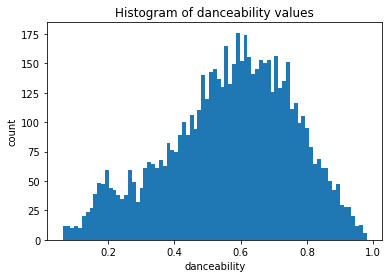

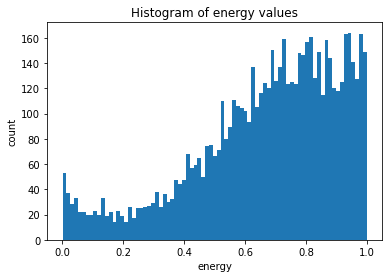

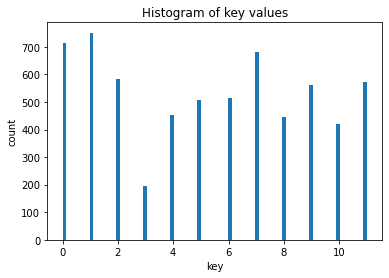

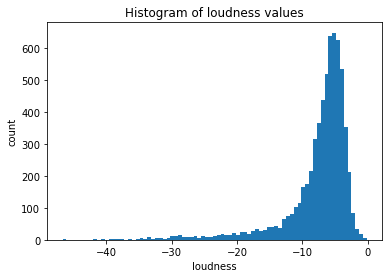

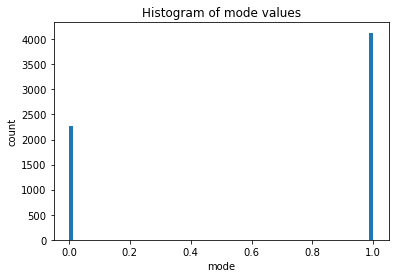

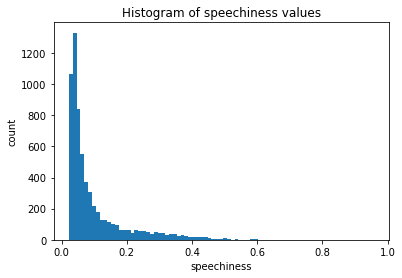

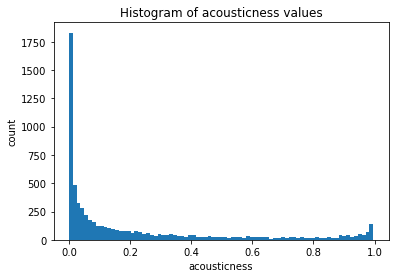

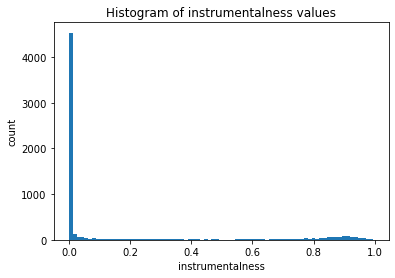

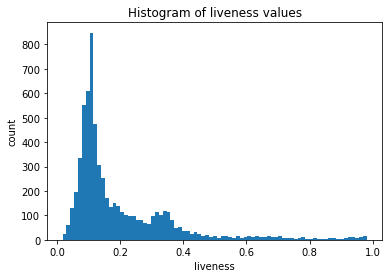

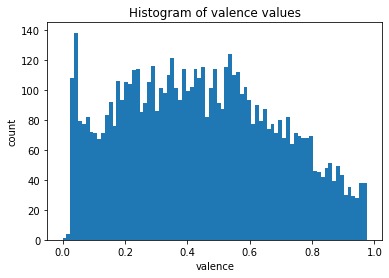

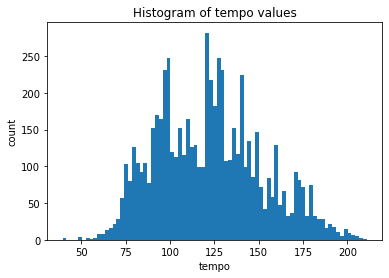

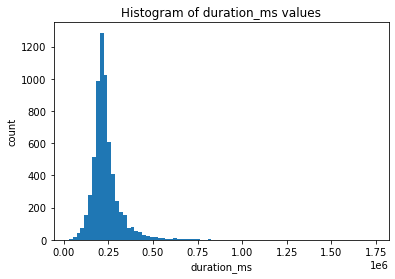

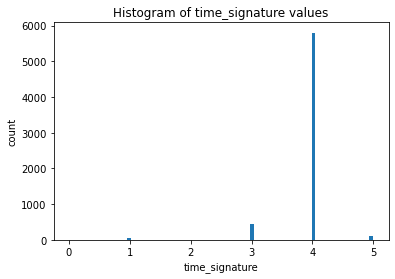

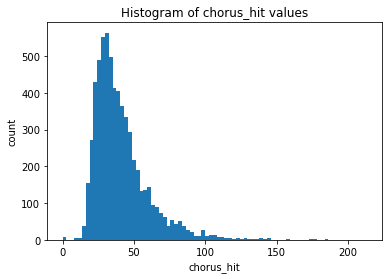

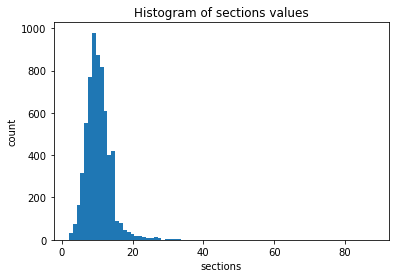

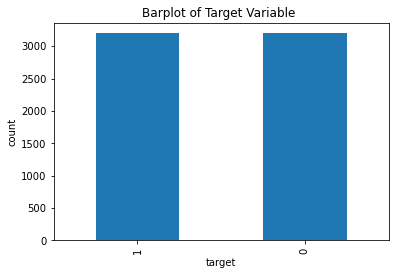

In [20]:
from matplotlib import pylab as plt
for column in columns:
    if column == "target":
        pd.value_counts(df[column]).plot.bar()
        figtitle = '../figures/barplot_target.png'
        plt.title('Barplot of Target Variable ')
        figtitle = f'../figures/barplot_descriptive_{column}.png'
    else:
        df[column].plot.hist(bins = int(np.sqrt(df.shape[0])))
        plt.title(f'Histogram of {column} values')
        figtitle = f'../figures/histogram_descriptive_{column}.png'
    plt.xlabel(column)
    plt.ylabel('count')
    
    plt.savefig(figtitle, dpi=300, format='png')
    plt.show()

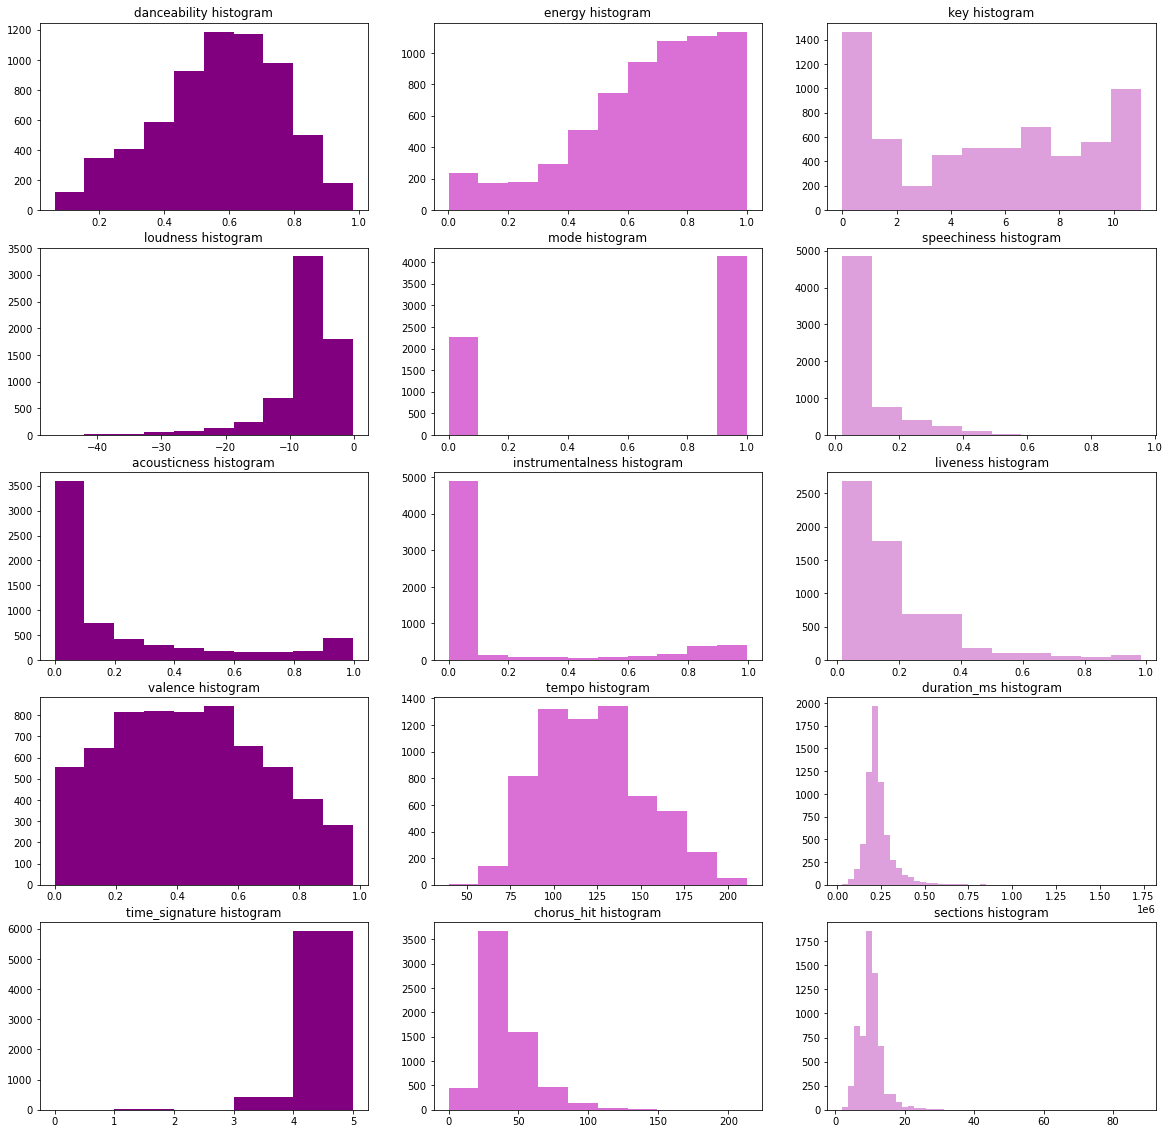

In [201]:
#create histograpms of all the variables to see distributions
fig, ax = plt.subplots(5,3, figsize=(20,20))

def hist_plot(row, column, variable, binsnum, color):
    ax[row, column].hist(df[variable], bins = binsnum, color = color)
    ax[row, column].set_title(variable + ' histogram')
    
hist_plot(0, 0, 'danceability', 10, 'purple')
hist_plot(0, 1, 'energy', 10, 'orchid')
hist_plot(0, 2, 'key', 10, 'plum')
hist_plot(1,0, 'loudness', 10, 'purple')
hist_plot(1,1, 'mode', 10, 'orchid')
hist_plot(1,2, 'speechiness', 10, 'plum')
hist_plot(2,0, 'acousticness', 10, 'purple')
hist_plot(2,1, 'instrumentalness', 10, 'orchid')
hist_plot(2,2, 'liveness', 10, 'plum')
hist_plot(3,0, 'valence', 10, 'purple')
hist_plot(3,1, 'tempo', 10, 'orchid')
hist_plot(3,2, 'duration_ms', 50, 'plum')
hist_plot(4,0, 'time_signature', 5, 'purple')
hist_plot(4,1, 'chorus_hit', 10, 'orchid')
hist_plot(4,2, 'sections', 50, 'plum')

plt.show()


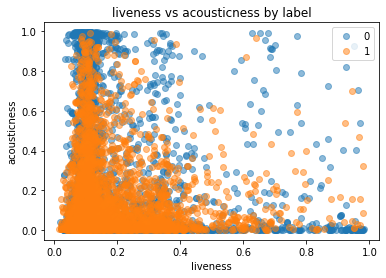

In [238]:
groups = df.groupby("target")
for name, group in groups:
    plt.plot(group['liveness'], group['acousticness'], marker="o", linestyle="", label=name,alpha=0.5)
plt.title("liveness vs acousticness by label")
plt.xlabel('liveness')
plt.ylabel('acousticness')
plt.legend()
plt.show()

1    3199
0    3199
Name: target, dtype: int64


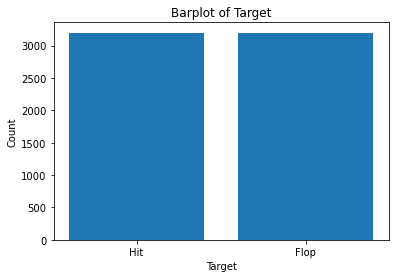

In [227]:
# Make a random dataset:
height = [df[df['target']==1].shape[0], df[df['target']==0].shape[0]]
bars = ('Hit', 'Flop')
y_pos = np.arange(len(bars))

print(df.target.value_counts())
# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.title('Barplot of Target')
plt.ylabel('Count')
plt.xlabel('Target')

# Show graphic
plt.show()

In [219]:
df[df['target']==1].shape[0]

3199

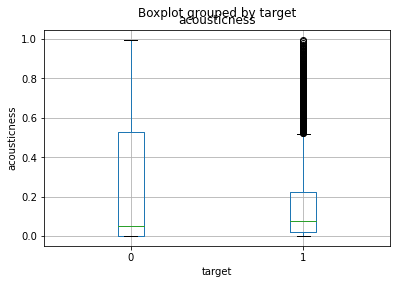

In [229]:
from matplotlib import pylab as plt
df[['target','acousticness']].boxplot(by='target')
plt.ylabel('acousticness')
plt.xlabel('target')
plt.show()

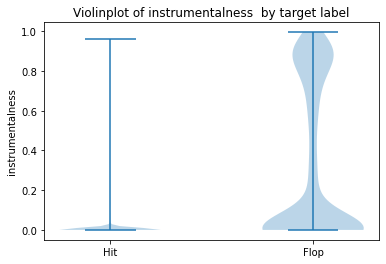

In [228]:

dataset = [df[df['target']==1]['instrumentalness'].values,
           df[df['target']==0]['instrumentalness'].values]

plt.violinplot(dataset = dataset)
plt.title('Violinplot of instrumentalness  by target label')
plt.xticks([1,2],['Hit','Flop'])
plt.ylabel('instrumentalness')
plt.show()

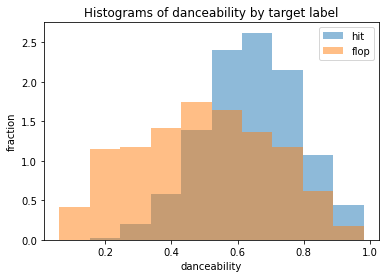

In [208]:
categories = df['target'].unique()
bin_range = (df['danceability'].min(),df['danceability'].max())
label=['flop','hit']
for c in categories:
    plt.hist(df[df['target']==c]['danceability'],alpha=0.5,label=label[c],range=bin_range,bins=10,density=True)
plt.legend()
plt.title('Histograms of danceability by target label')
plt.ylabel('fraction')
plt.xlabel('danceability')
plt.show()

# Data Preprocessing

In [241]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split,KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler
X = df2.drop(['target'], axis=1)
y = df2['target']
data_after_split=[]

#split out test data first
#use User as stratify reference
X_other, X_testMode, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)
#split train and validation data
#get strata reference for kfold
stratify_data=y.iloc[y_other]
# init kfold
kf =KFold(n_splits=5,shuffle=True,random_state=100)
# create a temporary dictionary for kfold and test data
random_split_tmp = {'kfold_train':[], 'kfold_val':[], 'test': []}

for train_idx, val_idx in kf.split(X_other,stratify_data):
    # get validation and train data 
    X_train, y_train = X_other.iloc[train_idx], y_other.iloc[train_idx]
    X_val, y_val = X_other.iloc[val_idx], y_other.iloc[val_idx]
    
    
    #fit_transform in train
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    #transform  in val and test
    X_val = ss.transform(X_val)
    X_test = ss.transform(X_testMode)
    
    #we don't need to change the "mode" since it's already encoded
    X_train[:,4]=X_other.iloc[train_idx]['mode']
    X_val[:,4]=X_other.iloc[val_idx]['mode']
    X_test[:,4]=X_testMode['mode']
    
    print(X_train.shape)
    print(X_val.shape)
    print(X_test.shape)
    print("***************")
     #save data into dictionary
    random_split_tmp['kfold_train'].append([X_train, y_train])
    random_split_tmp['kfold_val'].append([X_val, y_val])
    random_split_tmp['test'].append([X_test, y_test])

print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))



(4094, 15)
(1024, 15)
(1280, 15)
***************
(4094, 15)
(1024, 15)
(1280, 15)
***************
(4094, 15)
(1024, 15)
(1280, 15)
***************
(4095, 15)
(1023, 15)
(1280, 15)
***************
(4095, 15)
(1023, 15)
(1280, 15)
***************
1    0.500366
0    0.499634
Name: target, dtype: float64
0    0.501466
1    0.498534
Name: target, dtype: float64
1    0.5
0    0.5
Name: target, dtype: float64
